In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np

In [2]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.info() # three are categorical column:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.duplicated().sum()

0

### Making the Datafeame as per question:-

# Defining Feature and Target:-
##### X= Feature
##### Y_new = Target

In [6]:
X= df.drop(["Taxable.Income"], axis=1)
X.shape

(600, 5)

In [7]:
Y= pd.DataFrame(df["Taxable.Income"])
Y.shape

(600, 1)

In [8]:
# As per question taxable_income <= 30000 as "Risky" and others are "Good"
Y_ = Y<=30000
Y_new=pd.DataFrame(Y_.replace([False,True],['Good','Risky']))
print(Y_new)

    Taxable.Income
0             Good
1             Good
2             Good
3             Good
4             Good
5             Good
6             Good
7             Good
8             Good
9             Good
10           Risky
11            Good
12           Risky
13            Good
14            Good
15            Good
16           Risky
17            Good
18            Good
19           Risky
20            Good
21           Risky
22            Good
23            Good
24            Good
25            Good
26            Good
27            Good
28           Risky
29            Good
30            Good
31            Good
32            Good
33            Good
34           Risky
35            Good
36           Risky
37            Good
38           Risky
39            Good
40            Good
41            Good
42            Good
43            Good
44            Good
45            Good
46            Good
47            Good
48           Risky
49            Good
50            Good
51          

In [9]:
Y_new.value_counts()

Taxable.Income
Good              476
Risky             124
dtype: int64

In [12]:
X.dtypes

Undergrad          object
Marital.Status     object
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [14]:
Y_new.dtypes

Taxable.Income    object
dtype: object

# Visualization and EDA:-

<AxesSubplot:>

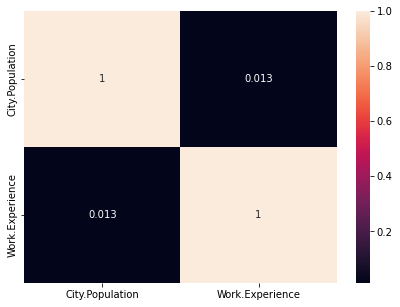

In [27]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(X.corr(),annot = True) # No relation exist betweem numerical column of features

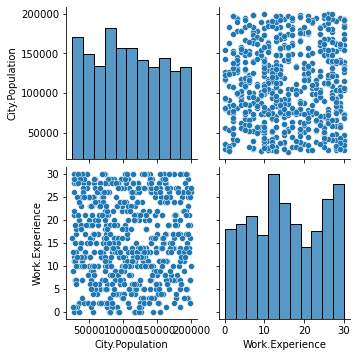

In [28]:
sns.pairplot(X)

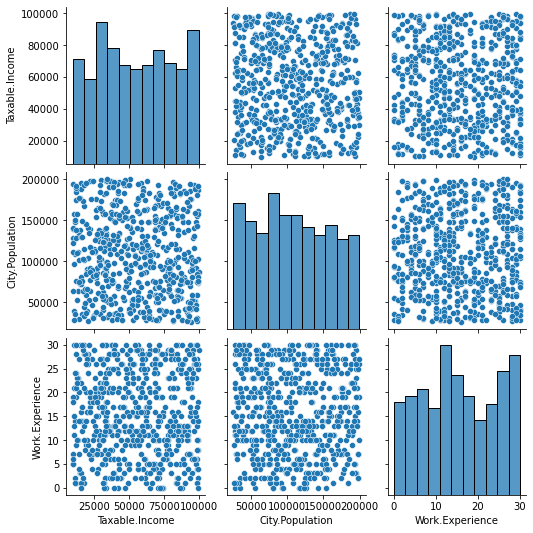

In [29]:
sns.pairplot(df) # whole DataFrame

<AxesSubplot:>

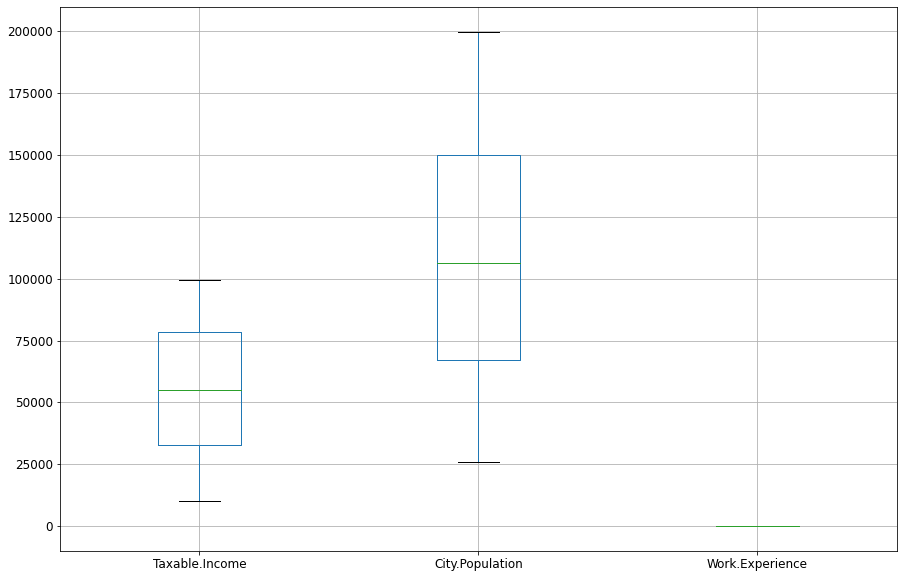

In [32]:
plt.figure(figsize=(15,10))
pd.DataFrame(data = df).boxplot(fontsize="large")
 # shows there no outlier exist

# Model Building:-


### Step 1.)
#### Encoading Feature and Target:-

In [36]:
X_enc = pd.get_dummies(X)
X_enc.shape

(600, 9)

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_enc = le.fit_transform(Y_new)
pd.DataFrame(Y_enc).head()

C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,0
1,0
2,0
3,0
4,0


### Step 2.)

#### Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaled = ss.fit_transform(X_enc)


### Step 3.)
#### Pereforming train test split.

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y_enc, test_size= 0.2, random_state=42,stratify=Y_scaled)

### Step 5. )
#### Calling Model:-

In [41]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

print(model.tree_.max_depth)
model.score(x_test,y_test) # model  score on traing data.

21


0.7166666666666667

[Text(0.7228444540727903, 0.9772727272727273, 'X[1] <= 0.899\ngini = 0.327\nsamples = 480\nvalue = [381, 99]'),
 Text(0.5690857885615251, 0.9318181818181818, 'X[0] <= 1.787\ngini = 0.35\nsamples = 358\nvalue = [277, 81]'),
 Text(0.432105719237435, 0.8863636363636364, 'X[1] <= 0.22\ngini = 0.344\nsamples = 353\nvalue = [275, 78]'),
 Text(0.2870883882149047, 0.8409090909090909, 'X[0] <= 1.75\ngini = 0.318\nsamples = 267\nvalue = [214, 53]'),
 Text(0.27599653379549394, 0.7954545454545454, 'X[0] <= 1.704\ngini = 0.323\nsamples = 262\nvalue = [209, 53]'),
 Text(0.25381282495667246, 0.75, 'X[0] <= 1.524\ngini = 0.316\nsamples = 259\nvalue = [208, 51]'),
 Text(0.2427209705372617, 0.7045454545454546, 'X[0] <= 1.5\ngini = 0.324\nsamples = 251\nvalue = [200, 51]'),
 Text(0.23162911611785095, 0.6590909090909091, 'X[0] <= 1.387\ngini = 0.316\nsamples = 249\nvalue = [200, 49]'),
 Text(0.2205372616984402, 0.6136363636363636, 'X[0] <= 1.369\ngini = 0.325\nsamples = 240\nvalue = [191, 49]'),
 Text(0.2

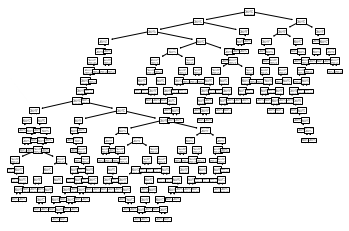

In [42]:
tree.plot_tree(model)

# Applying Hyperparametric Tuning:-

# 1.)

In [44]:
from sklearn.model_selection import GridSearchCV

params_grid = [{"criterion": ["gini"],"max_depth": range(1,21,1),"max_features":range(1,9,1), "max_leaf_nodes":range(1,144,1)}]

gsv = GridSearchCV(model, params_grid)

gsv.fit(x_train,y_train)


C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
800 fits failed out of a total of 114400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 1 must be either None or larger 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini'], 'max_depth': range(1, 21),
                          'max_features': range(1, 9),
                          'max_leaf_nodes': range(1, 144)}])

In [45]:
gsv.best_params_ , gsv.best_score_

({'criterion': 'gini',
  'max_depth': 4,
  'max_features': 2,
  'max_leaf_nodes': 84},
 0.7999999999999999)

# 2.)

In [48]:
# changing criteria and taking only max depth.

from sklearn.model_selection import GridSearchCV

params_grid = [{"criterion": ["entropy"],"max_depth": range(1,19,1)}]
gsv = GridSearchCV(model, params_grid)

gsv.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy'], 'max_depth': range(1, 19)}])

In [47]:
gsv.best_params_ , gsv.best_score_

({'criterion': 'entropy', 'max_depth': 1}, 0.79375)

# model formation after tuning:-

In [59]:
model= DecisionTreeClassifier(criterion = "gini",max_depth = 4, max_leaf_nodes = 84)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7916666666666666

[Text(0.5208333333333334, 0.9, 'X[1] <= 0.899\ngini = 0.327\nsamples = 480\nvalue = [381, 99]'),
 Text(0.2708333333333333, 0.7, 'X[0] <= 1.787\ngini = 0.35\nsamples = 358\nvalue = [277, 81]'),
 Text(0.16666666666666666, 0.5, 'X[1] <= 0.22\ngini = 0.344\nsamples = 353\nvalue = [275, 78]'),
 Text(0.08333333333333333, 0.3, 'X[0] <= 1.75\ngini = 0.318\nsamples = 267\nvalue = [214, 53]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.323\nsamples = 262\nvalue = [209, 53]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.25, 0.3, 'X[1] <= 0.559\ngini = 0.412\nsamples = 86\nvalue = [61, 25]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.473\nsamples = 39\nvalue = [24, 15]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.335\nsamples = 47\nvalue = [37, 10]'),
 Text(0.375, 0.5, 'X[7] <= 0.007\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4166666666666667, 0.3, 'X[2] <= 0.04\ngini = 0.375\nsamples = 4\

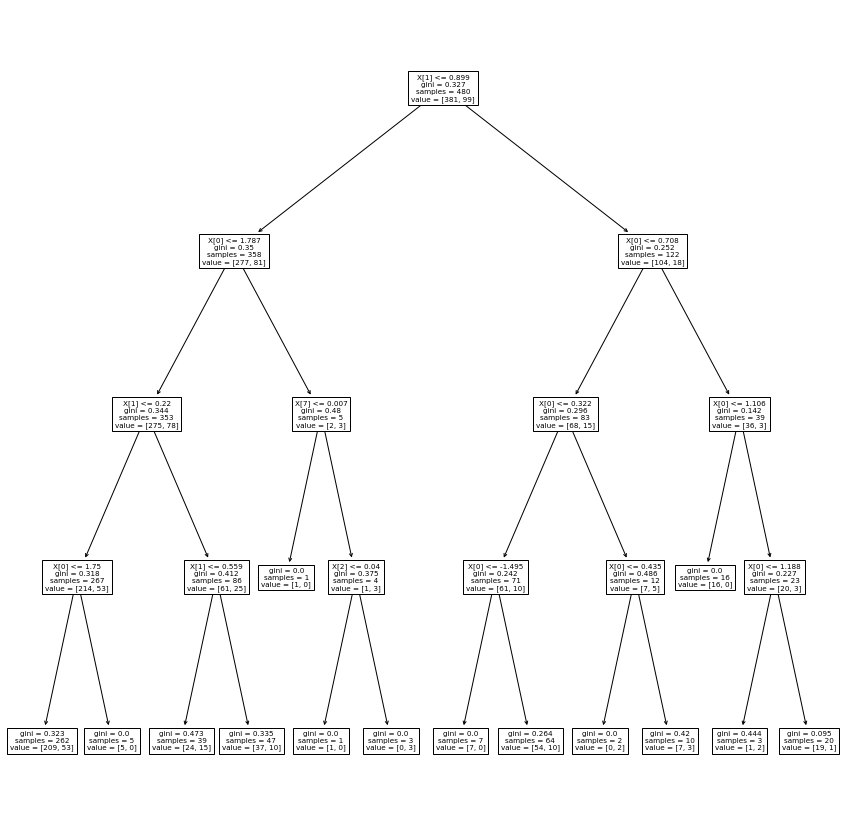

In [56]:
plt.figure(figsize=(15,15))
tree.plot_tree(model)